In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
_FOLDER = "../data/"

In [12]:
def FilteringCurves(df, response_columns, filtering_scenario = [1,2,3], first_columns_to_compare = [1, 2], last_columns_to_compare = [-1, -2],
             tolerance=0.05, first_points_lower_limit = 0.8, last_points_upper_limit = 0.4):
    """
    filtering_scenario = [1,2,3]
    1. Ensure that all the response are less than 1
    
    2. Ensure that first and last points form plateus
    the minimal number of points are specified in the function arguments
    by default, two points for both lpateus are considered
    tolerance =0.05 values to ensure the points form a plateu
    first_columns_to_compare = [1, 2]  - first two columns for plateu
    last_columns_to_compare = [-1, -2] - last two columns for plateu
    
    3. Specify location of the plateus - first_points_lower_limit and last_points_upper_limit
    
    """
    df = df.copy()
    print("Original dataset:", df.shape)
    
    for i in filtering_scenario:
        if i ==1:
            #1st filtering
            index_row_more_than_1 = []
            for col in response_columns:
                if sum(df[col]>1)>0:
                    index_row_more_than_1.extend(df[df[col]>1].index)
        
            index_row_less_than_1 = set(df.index) - set(index_row_more_than_1)
            df = df.loc[index_row_less_than_1, :].copy()
            print("1st filtration (Ensure that all the response are less than 1): Filtered dataset:", df.shape)
        elif i== 2: 
            #2nd filtering
            df["dif_first"]=abs(df[response_columns[first_columns_to_compare[0]-1]]\
                                     - df[response_columns[first_columns_to_compare[1]-1]])
            df["dif_last"]=abs(df[response_columns[last_columns_to_compare[0]]] \
                                        - df[response_columns[last_columns_to_compare[1]]])

            df = df[(df["dif_first"]<= tolerance)
                           &(df["dif_last"]<= tolerance)]
    
            print("2d filtration (Ensure that first and last points form plateus): Filtered dataset:", df.shape)
        elif i== 3: 
                #3d filtering
                df = df[(df[response_columns[1]]>first_points_lower_limit) 
                         & (df[response_columns[-1]]<last_points_upper_limit)]
                print("3d stage filtration (Specified location of the plateus): Filtered dataset:", df.shape)
        else:
            print("Unknown filtration scenario")
    
    return df
    
def ShowResponseCurves(df, plots_in_row, plots_in_column, x_columns, y_columns, start_index=0, indexes=[]):
 
                
    fig = plt.figure(figsize=(14, 11))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    n_plots= plots_in_row*plots_in_column
    
    if len(indexes) ==0:
        indexes =df.index[start_index : start_index+n_plots]
        
    try:
        for i, ind in list(enumerate(indexes)):
            x = df.loc[ind, x_columns]
            y = df.loc[ind, y_columns]
                
            ax = fig.add_subplot(plots_in_row, plots_in_column, i+1)
            ax.scatter(x,y)
            ax.set_title(str(ind)+"_"+str(df.loc[ind, "DRUG_ID"])+"_"+df.loc[ind, "CELL_LINE_NAME"])
            ax.set_xlabel("Scaled dosage")
            ax.set_ylabel("Normalised response")
           
    except:
        print("ERROR: Number of indexes does not correspond to number of graphs to plot")
        

### Original data

In [13]:
drug_curves = pd.read_csv(_FOLDER+"normalised_dose_response_data.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]

drug_curves.shape

(225384, 44)

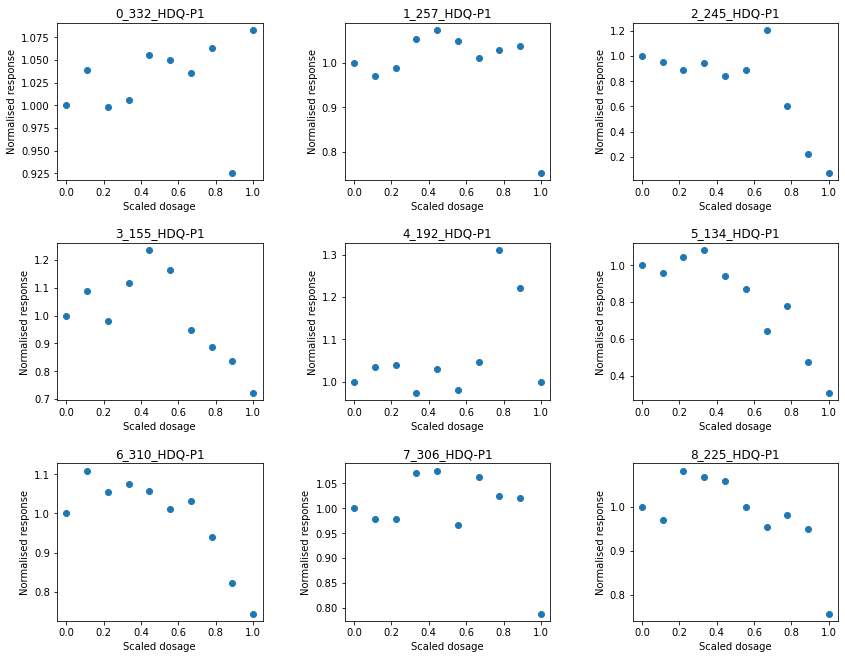

In [14]:
ShowResponseCurves(drug_curves, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=drug_curves.index[:9])

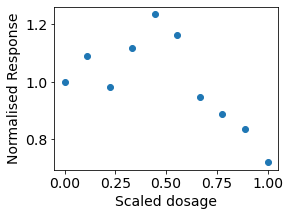

In [15]:
plt.figure(figsize=(4,3))
ind = drug_curves.index[3]
x = drug_curves.loc[ind, conc_columns]
y = drug_curves.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=14)
plt.xlabel("Scaled dosage", fontsize=14)
plt.ylabel("Normalised Response", fontsize=14);
plt.savefig("filt0.png", bbox_inches='tight')

In [16]:
df = FilteringCurves(drug_curves, filtering_scenario=[1], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)


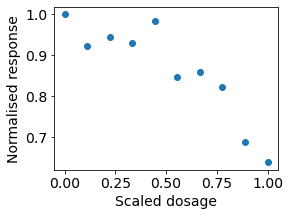

In [17]:
plt.figure(figsize=(4,3))
ind = df.index[6]
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=14)
plt.xlabel("Scaled dosage", fontsize=14)
plt.ylabel("Normalised response", fontsize=14);
plt.savefig("filt_1stage.png", bbox_inches='tight')

In [18]:
df = FilteringCurves(drug_curves, filtering_scenario=[1, 2], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)
plt.figure(figsize=(4,3))
ind = df.index[]
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=14)
plt.xlabel("Scaled dosage", fontsize=14)
plt.ylabel("Normalised response", fontsize=14);
plt.savefig("filt2.png", bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-18-86f50fbb8d10>, line 5)

In [ ]:
df = FilteringCurves(drug_curves, filtering_scenario=[1, 2,3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)
plt.figure(figsize=(4,3))
ind = df.index[9]
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=14)
plt.xlabel("Scaled dosage", fontsize=14)
plt.ylabel("Normalised response", fontsize=14);
plt.savefig("filt4.png", bbox_inches='tight')

In [ ]:
ShowResponseCurves(df, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=df.index[:9])

### Filtered data

**Filtering_curves**
(df, response_columns, filtering_scenario = [1,2,3], first_columns_to_compare = [1, 2], last_columns_to_compare = [-1, -2], tolerance=0.05, first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

filtering_scenario = [1,2,3]
1. Ensure that all the response are less than 1

2. Ensure that first and last points form a plateu
the minimal number of points are specified in the function arguments
by default, two points for both lpateus are considered
tolerance =0.05 values to ensure the points form a plateu
first_columns_to_compare = [1, 2]  - first two columns for plateu
last_columns_to_compare = [-1, -2] - last two columns for plateu

3. Specify location of the plateus - first_points_lower_limit and last_points_upper_limit

In [ ]:
df = FilteringCurves(drug_curves, filtering_scenario=[1], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

In [ ]:
ShowResponseCurves(df, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=df.index[:9])

In [19]:
#save the data
print("\n1,2,3 filtration : less than 1, 2 plateus, limits for first and last points\n")
df = FilteringCurves(drug_curves, filtering_scenario=[1, 2, 3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)
df.to_csv("../results/filtered_drug_profiles_123.csv")

print("\n1,2 filtration : less than 1, 2 plateus, limits for first and last points\n")
df = FilteringCurves(drug_curves, filtering_scenario=[1, 2], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)
# df.to_csv("../results/filtered_drug_profiles_12.csv")

print("\n1, 3 filtration : less than 1, limits for first and last points\n")
df = FilteringCurves(drug_curves, filtering_scenario=[1, 3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)
# df.to_csv("../results/filtered_drug_profiles_13.csv")

print("\n2,3 filtration : 2 plateus, limits for first and last points\n")
df = FilteringCurves(drug_curves, filtering_scenario=[2, 3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)
# df.to_csv("../results/filtered_drug_profiles_23.csv")


1,2,3 filtration : less than 1, 2 plateus, limits for first and last points

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)
3d stage filtration (Specified location of the plateus): Filtered dataset: (2776, 46)

1,2 filtration : less than 1, 2 plateus, limits for first and last points

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)

1, 3 filtration : less than 1, limits for first and last points

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
3d stage filtration (Specified location of the plateus): Filtered dataset: (19037, 44)

2,3 filtration : 2 plateus, limits for first and